In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
data =np.array([["Jonas_1", "'word', 'lord', 'came', 'jonah', 'son', 'amittai', ',', 'saying', ',', 'arise', ',', 'go', 'nineveh', ',', 'great', 'city', ',', 'cry', ';', 'wickedness', 'come', 'me.but', 'jonah', 'rose', 'flee', 'tarshish', 'presence', 'lord', ',', 'went', 'joppa', ';', 'found', 'ship', 'going', 'tarshish', ':', 'paid', 'fare', 'thereof', ',', 'went', ',', 'go', 'tarshish', 'presence', 'lord.but', 'lord', 'sent', 'great', 'wind', 'sea', ',', 'mighty', 'tempest', 'sea', ',', 'ship', 'like', 'broken.then', 'mariners', 'afraid', ',', 'cried', 'every', 'man', 'god', ',', 'cast', 'forth', 'wares', 'ship', 'sea', ',', 'lighten', '.', 'jonah', 'gone', 'sides', 'ship', ';', 'lay', ',', 'fast', 'asleep.so', 'shipmaster', 'came', ',', 'said', ',', 'mean', ',', 'sleeper', '?', 'arise', ',', 'call', 'god', ',', 'god', 'think', 'us', ',', 'perish', 'not.and', 'said', 'every', 'one', 'fellow', ',', 'come', ',', 'let', 'us', 'cast', 'lots', ',', 'may', 'know', 'whose', 'cause', 'evil', 'us', '.', 'cast', 'lots', ',', 'lot', 'fell', 'jonah.then', 'said', ',', 'tell', 'us', ',', 'pray', ',', 'whose', 'cause', 'evil', 'us', ';', 'occupation', '?', 'come', '?', 'country', '?', 'people', '?', 'said', ',', 'hebrew', ';', 'fear', 'lord', ',', 'god', 'heaven', ',', 'made', 'sea', 'dry', 'land.then', 'men', 'exceedingly', 'afraid', ',', 'said', '.', 'done', '?', 'men', 'knew', 'fled', 'presence', 'lord', ',', 'told', 'them.then', 'said', ',', 'shall', ',', 'sea', 'may', 'calm', 'us', '?', 'sea', 'worked', ',', 'tempestuous.and', 'said', ',', 'take', ',', 'cast', 'forth', 'sea', ';', 'shall', 'sea', 'calm', ':', 'know', 'sake', 'great', 'tempest', 'you.nevertheless', 'men', 'rowed', 'hard', 'bring', 'land', ';', 'could', ':', 'sea', 'worked', ',', 'tempestuous', 'them.why', 'cried', 'lord', ',', 'said', ',', 'beseech', ',', 'lord', ',', 'beseech', ',', 'let', 'us', 'perish', 'man', ', 'life', ',', 'lay', 'us', 'innocent', 'blood', ':', ',', 'lord', ',', 'done', 'pleased', 'you.so', 'look', 'jonah', ',', 'cast', 'forth', 'sea', ':', 'sea', 'ceased', 'raging.then', 'men', 'feared', 'lord', 'exceedingly', ',', 'offered', 'sacrifice', 'lord', ',', 'made', 'vows.now', 'lord', 'prepared', 'great', 'fish', 'swallow', 'jonah', '.', 'jonah', 'belly', 'fish', 'three', 'days', 'three', 'nights', '.'"],
               ["Jonas_2", "'jonah', 'prayed', 'lord', 'god', 'fish', ', 'belly', ',', 'said', ',', 'cried', 'reason', 'affliction', 'lord', ',', 'heard', ';', 'belly', 'hell', 'cried', ',', 'heard', 'voice.for', 'cast', 'deep', ',', 'middle', 'seas', ';', 'floods', 'compassed', ':', 'billows', 'waves', 'passed', 'me.then', 'said', ',', 'cast', 'sight', ';', 'yet', 'look', 'toward', 'holy', 'temple.the', 'waters', 'compassed', ',', 'even', 'soul', ':', 'depth', 'closed', 'round', ',', 'weeds', 'wrapped', 'head.i', 'went', 'bottoms', 'mountains', ';', 'earth', 'bars', 'ever', ':', 'yet', 'brought', 'life', 'corruption', ',', 'lord', 'god.when', 'soul', 'fainted', 'within', 'remembered', 'lord', ':', 'prayer', 'came', ',', 'holy', 'temple.they', 'observe', 'lying', 'vanities', 'forsake', 'mercy.but', 'sacrifice', 'voice', 'thanksgiving', ';', 'pay', 'vowed', '.', 'salvation', 'lord.and', 'lord', 'spoke', 'fish', ',', 'vomited', 'jonah', 'dry', 'land', '.'"],
               ["Jonas_3", "'word', 'lord', 'came', 'jonah', 'second', 'time', ',', 'saying', ',', 'arise', ',', 'go', 'nineveh', ',', 'great', 'city', ',', 'preach', 'preaching', 'bid', 'you.so', 'jonah', 'arose', ',', 'went', 'nineveh', ',', 'according', 'word', 'lord', '.', 'nineveh', 'exceeding', 'great', 'city', 'three', days'journey.and, 'jonah', 'began', 'enter', 'city', 'day', ', 'journey', ',', 'cried', ',', 'said', ',', 'yet', 'forty', 'days', ',', 'nineveh', 'shall', 'overthrown.so', 'people', 'nineveh', 'believed', 'god', ',', 'proclaimed', 'fast', ',', 'put', 'sackcloth', ',', 'greatest', 'even', 'least', 'them.for', 'word', 'came', 'king', 'nineveh', ',', 'arose', 'throne', ',', 'laid', 'robe', ',', 'covered', 'sackcloth', ',', 'sat', 'ashes.and', 'caused', 'proclaimed', 'published', 'nineveh', 'decree', 'king', 'nobles', ',', 'saying', ',', 'let', 'neither', 'man', 'beast', ',', 'herd', 'flock', ',', 'taste', 'thing', ':', 'let', 'feed', ',', 'drink', 'water', ':', 'let', 'man', 'beast', 'covered', 'sackcloth', ',', 'cry', 'mightily', 'god', ':', 'yes', ',', 'let', 'turn', 'every', 'one', 'evil', 'way', ',', 'violence', 'hands.who', 'tell', 'god', 'turn', 'repent', ',', 'turn', 'away', 'fierce', 'anger', ',', 'perish', '?', 'god', 'saw', 'works', ',', 'turned', 'evil', 'way', ';', 'god', 'repented', 'evil', ',', 'said', 'would', ';', '.'"],
               ["Jonas_4", "'displeased', 'jonah', 'exceedingly', ',', 'angry.and', 'prayed', 'lord', ',', 'said', ',', 'pray', ',', 'lord', ',', 'saying', ',', 'yet', 'country', '?', 'therefore', 'fled', 'tarshish', ':', 'knew', 'gracious', 'god', ',', 'merciful', ',', 'slow', 'anger', ',', 'great', 'kindness', ',', 'repent', 'evil.therefore', ',', 'lord', ',', 'take', ',', 'beseech', ',', 'life', ';', 'better', 'die', 'live.then', 'said', 'lord', ',', 'well', 'angry', '?', 'jonah', 'went', 'city', ',', 'sat', 'east', 'side', 'city', ',', 'made', 'booth', ',', 'sat', 'shadow', ',', 'till', 'might', 'see', 'would', 'become', 'city.and', 'lord', 'god', 'prepared', 'gourd', ',', 'made', 'come', 'jonah', ',', 'might', 'shadow', 'head', ',', 'deliver', 'grief', '.', 'jonah', 'exceeding', 'glad', 'gourd.but', 'god', 'prepared', 'worm', 'morning', 'rose', 'next', 'day', ',', 'smote', 'gourd', 'withered.and', 'came', 'pass', ',', 'sun', 'arise', ',', 'god', 'prepared', 'vehement', 'east', 'wind', ';', 'sun', 'beat', 'head', 'jonah', ',', 'fainted', ',', 'wished', 'die', ',', 'said', ',', 'better', 'die', 'live.and', 'god', 'said', 'jonah', ',', 'well', 'angry', 'gourd', '?', 'said', ',', 'well', 'angry', ',', 'even', 'death.then', 'said', 'lord', ',', 'pity', 'gourd', ',', 'labored', ',', 'neither', 'made', 'grow', ';', 'came', 'night', ',', 'perished', 'night', ':', 'spare', 'nineveh', ',', 'great', 'city', ',', 'wherein', 'six', 'score', 'thousand', 'persons', 'discern', 'right', 'hand', 'left', 'hand', ';', 'also', 'much', 'cattle', '?'"],
               ["Zacarias_1", "'eighth', 'month', ',', 'second', 'year', 'darius', ',', 'came', 'word', 'lord', 'zechariah', ',', 'son', 'berechiah', ',', 'son', 'iddo', 'prophet', ',', 'saying', ',', 'lord', 'sore', 'displeased', 'fathers.therefore', 'say', ',', 'thus', 'said', 'lord', 'hosts', ';', 'turn', ',', 'said', 'lord', 'hosts', ',', 'turn', ',', 'said', 'lord', 'hosts.be', 'fathers', ',', 'former', 'prophets', 'cried', ',', 'saying', ',', 'thus', 'said', 'lord', 'hosts', ';', 'turn', 'evil', 'ways', ',', 'evil', 'doings', ':', 'hear', ',', 'listen', ',', 'said', 'lord.your', 'fathers', ',', '?', 'prophets', ',', 'live', 'ever', '?', 'words', 'statutes', ',', 'commanded', 'servants', 'prophets', ',', 'take', 'hold', 'fathers', '?', 'returned', 'said', ',', 'like', 'lord', 'hosts', 'thought', 'us', ',', 'according', 'ways', ',', 'according', 'doings', ',', 'dealt', 'us.on', 'four', 'twentieth', 'day', 'eleventh', 'month', ',', 'month', 'sebat', ',', 'second', 'year', 'darius', ',', 'came', 'word', 'lord', 'zechariah', ',', 'son', 'berechiah', ',', 'son', 'iddo', 'prophet', ',', 'saying', ',', 'saw', 'night', ',', 'behold', 'man', 'riding', 'red', 'horse', ',', 'stood', 'among', 'myrtle', 'trees', 'bottom', ';', 'behind', 'red', 'horses', ',', 'speckled', ',', 'white.then', 'said', ',', 'lord', ',', '?', 'angel', 'talked', 'said', ',', 'show', 'be.and', 'man', 'stood', 'among', 'myrtle', 'trees', 'answered', 'said', ',', 'lord', 'sent', 'walk', 'fro', 'earth.and', 'answered', 'angel', 'lord', 'stood', 'among', 'myrtle', 'trees', ',', 'said', ',', 'walked', 'fro', 'earth', ',', ',', 'behold', ',', 'earth', 'sits', 'still', ',', 'rest.then', 'angel', 'lord', 'answered', 'said', ',', 'lord', 'hosts', ',', 'long', 'mercy', 'jerusalem', 'cities', 'judah', ',', 'indignation', 'three', 'score', 'ten', 'years', '?', 'lord', 'answered', 'angel', 'talked', 'good', 'words', 'comfortable', 'words.so', 'angel', 'communed', 'said', ',', 'cry', ',', 'saying', ',', 'thus', 'said', 'lord', 'hosts', ';', 'jealous', 'jerusalem', 'zion', 'great', 'jealousy.and', 'sore', 'displeased', 'heathen', 'ease', ':', 'little', 'displeased', ',', 'helped', 'forward', 'affliction.therefore', 'thus', 'said', 'lord', ';', 'returned', 'jerusalem', 'mercies', ':', 'house', 'shall', 'built', ',', 'said', 'lord', 'hosts', ',', 'line', 'shall', 'stretched', 'forth', 'jerusalem.cry', 'yet', ',', 'saying', ',', 'thus', 'said', 'lord', 'hosts', ';', 'cities', 'prosperity', 'shall', 'yet', 'spread', 'abroad', ';', 'lord', 'shall', 'yet', 'comfort', 'zion', ',', 'shall', 'yet', 'choose', 'jerusalem.then', 'lifted', 'eyes', ',', 'saw', ',', 'behold', 'four', 'horns.and', 'said', 'angel', 'talked', ',', '?', 'answered', ',', 'horns', 'scattered', 'judah', ',', 'israel', ',', 'jerusalem.and', 'lord', 'showed', 'four', 'carpenters.then', 'said', ',', 'come', '?', 'spoke', ',', 'saying', ',', 'horns', 'scattered', 'judah', ',', 'man', 'lift', 'head', ':', 'come', 'fray', ',', 'cast', 'horns', 'gentiles', ',', 'lifted', 'horn', 'land', 'judah', 'scatter', '.'"],
               ["Zacarias_2", "'lifted', 'eyes', ',', 'looked', ',', 'behold', 'man', 'measuring', 'line', 'hand.then', 'said', ',', 'go', '?', 'said', ',', 'measure', 'jerusalem', ',', 'see', 'breadth', 'thereof', ',', 'length', 'thereof.and', ',', 'behold', ',', 'angel', 'talked', 'went', 'forth', ',', 'another', 'angel', 'went', 'meet', ',', 'said', ',', 'run', ',', 'speak', 'young', 'man', ',', 'saying', ',', 'jerusalem', 'shall', 'inhabited', 'towns', 'without', 'walls', 'multitude', 'men', 'cattle', 'therein', ':', ',', 'said', 'lord', ',', 'wall', 'fire', 'round', ',', 'glory', 'middle', 'her.ho', ',', 'ho', ',', 'come', 'forth', ',', 'flee', 'land', 'north', ',', 'said', 'lord', ':', 'spread', 'abroad', 'four', 'winds', 'heaven', ',', 'said', 'lord.deliver', ',', 'zion', ',', 'dwell', 'daughter', 'babylon.for', 'thus', 'said', 'lord', 'hosts', ';', 'glory', 'sent', 'nations', 'spoiled', ':', 'touches', 'touches', 'apple', 'eye.for', ',', 'behold', ',', 'shake', 'hand', ',', 'shall', 'spoil', 'servants', ':', 'shall', 'know', 'lord', 'hosts', 'sent', 'me.sing', 'rejoice', ',', 'daughter', 'zion', ':', ',', 'see', ',', 'come', ',', 'dwell', 'middle', ',', 'said', 'lord.and', 'many', 'nations', 'shall', 'joined', 'lord', 'day', ',', 'shall', 'people', ':', 'dwell', 'middle', ',', 'shall', 'know', 'lord', 'hosts', 'sent', 'you.and', 'lord', 'shall', 'inherit', 'judah', 'portion', 'holy', 'land', ',', 'shall', 'choose', 'jerusalem', 'again.be', 'silent', ',', 'flesh', ',', 'lord', ':', 'raised', 'holy', 'habitation', '.'"],
               ["Zacarias_3", "'showed', 'joshua', 'high', 'priest', 'standing', 'angel', 'lord', ',', 'satan', 'standing', 'right', 'hand', 'resist', 'him.and', 'lord', 'said', 'satan', ',', 'lord', 'rebuke', ',', 'satan', ';', 'even', 'lord', 'chosen', 'jerusalem', 'rebuke', ':', 'brand', 'plucked', 'fire', '?', 'joshua', 'clothed', 'filthy', 'garments', ',', 'stood', 'angel.and', 'answered', 'spoke', 'stood', ',', 'saying', ',', 'take', 'away', 'filthy', 'garments', '.', 'said', ',', 'behold', ',', 'caused', 'iniquity', 'pass', ',', 'clothe', 'change', 'raiment.and', 'said', ',', 'let', 'set', 'fair', 'turban', 'head', '.', 'set', 'fair', 'turban', 'head', ',', 'clothed', 'garments', '.', 'angel', 'lord', 'stood', 'by.and', 'angel', 'lord', 'protested', 'joshua', ',', 'saying', ',', 'thus', 'said', 'lord', 'hosts', ';', 'walk', 'ways', ',', 'keep', 'charge', ',', 'shall', 'also', 'judge', 'house', ',', 'shall', 'also', 'keep', 'courts', ',', 'give', 'places', 'walk', 'among', 'stand', 'by.hear', ',', 'joshua', 'high', 'priest', ',', ',', 'fellows', 'sit', ':', 'men', 'wondered', ':', ',', 'behold', ',', 'bring', 'forth', 'servant', 'branch.for', 'behold', 'stone', 'laid', 'joshua', ';', 'one', 'stone', 'shall', 'seven', 'eyes', ':', 'behold', ',', 'engrave', 'engraving', 'thereof', ',', 'said', 'lord', 'hosts', ',', 'remove', 'iniquity', 'land', 'one', 'day.in', 'day', ',', 'said', 'lord', 'hosts', ',', 'shall', 'call', 'every', 'man', 'neighbor', 'vine', 'fig', 'tree', '.'"],
               ["Zacarias_4", "'angel', 'talked', 'came', ',', 'waked', ',', 'man', 'wakened', 'sleep.and', 'said', ',', 'see', '?', 'said', ',', 'looked', ',', 'behold', 'candlestick', 'gold', ',', 'bowl', 'top', ',', 'seven', 'lamps', 'thereon', ',', 'seven', 'pipes', 'seven', 'lamps', ',', 'top', 'thereof', ':', 'two', 'olive', 'trees', ',', 'one', 'right', 'side', 'bowl', ',', 'left', 'side', 'thereof.so', 'answered', 'spoke', 'angel', 'talked', ',', 'saying', ',', ',', 'lord', '?', 'angel', 'talked', 'answered', 'said', ',', 'know', '?', 'said', ',', ',', 'lord.then', 'answered', 'spoke', ',', 'saying', ',', 'word', 'lord', 'zerubbabel', ',', 'saying', ',', 'might', ',', 'power', ',', 'spirit', ',', 'said', 'lord', 'hosts.who', ',', 'great', 'mountain', '?', 'zerubbabel', 'shall', 'become', 'plain', ':', 'shall', 'bring', 'forth', 'headstone', 'thereof', 'shoutings', ',', 'crying', ',', 'grace', ',', 'grace', 'it.moreover', 'word', 'lord', 'came', ',', 'saying', ',', 'hands', 'zerubbabel', 'laid', 'foundation', 'house', ';', 'hands', 'shall', 'also', 'finish', ';', 'shall', 'know', 'lord', 'hosts', 'sent', 'you.for', 'despised', 'day', 'small', 'things', '?', 'shall', 'rejoice', ',', 'shall', 'see', 'plummet', 'hand', 'zerubbabel', 'seven', ';', 'eyes', 'lord', ',', 'run', 'fro', 'whole', 'earth.then', 'answered', ',', 'said', ',', 'two', 'olive', 'trees', 'right', 'side', 'candlestick', 'left', 'side', 'thereof', '?', 'answered', ',', 'said', ',', 'two', 'olive', 'branches', 'two', 'golden', 'pipes', 'empty', 'golden', 'oil', '?', 'answered', 'said', ',', 'know', '?', 'said', ',', ',', 'lord.then', 'said', ',', 'two', 'anointed', 'ones', ',', 'stand', 'lord', 'whole', 'earth', '.'"],
               ["Zacarias_5", "'turned', ',', 'lifted', 'eyes', ',', 'looked', ',', 'behold', 'flying', 'roll.and', 'said', ',', 'see', '?', 'answered', ',', 'see', 'flying', 'roll', ';', 'length', 'thereof', 'twenty', 'cubits', ',', 'breadth', 'thereof', 'ten', 'cubits.then', 'said', ',', 'curse', 'goes', 'forth', 'face', 'whole', 'earth', ':', 'every', 'one', 'steals', 'shall', 'cut', 'side', 'according', ';', 'every', 'one', 'swears', 'shall', 'cut', 'side', 'according', 'it.i', 'bring', 'forth', ',', 'said', 'lord', 'hosts', ',', 'shall', 'enter', 'house', 'thief', ',', 'house', 'swears', 'falsely', 'name', ':', 'shall', 'remain', 'middle', 'house', ',', 'shall', 'consume', 'timber', 'thereof', 'stones', 'thereof.then', 'angel', 'talked', 'went', 'forth', ',', 'said', ',', 'lift', 'eyes', ',', 'see', 'goes', 'forth.and', 'said', ',', '?', 'said', ',', 'ephah', 'goes', 'forth', '.', 'said', 'moreover', ',', 'resemblance', 'earth.and', ',', 'behold', ',', 'lifted', 'talent', 'lead', ':', 'woman', 'sits', 'middle', 'ephah.and', 'said', ',', 'wickedness', '.', 'cast', 'middle', 'ephah', ';', 'cast', 'weight', 'lead', 'mouth', 'thereof.then', 'lifted', 'eyes', ',', 'looked', ',', ',', 'behold', ',', 'came', 'two', 'women', ',', 'wind', 'wings', ';', 'wings', 'like', 'wings', 'stork', ':', 'lifted', 'ephah', 'earth', 'heaven.then', 'said', 'angel', 'talked', ',', 'bear', 'ephah', '?', 'said', ',', 'build', 'house', 'land', 'shinar', ':', 'shall', 'established', ',', 'set', 'base', '.'"],
               ["Zacarias_6", "'turned', ',', 'lifted', 'eyes', ',', 'looked', ',', ',', 'behold', ',', 'came', 'four', 'chariots', 'two', 'mountains', ';', 'mountains', 'mountains', 'brass.in', 'first', 'chariot', 'red', 'horses', ';', 'second', 'chariot', 'black', 'horses', ';', 'third', 'chariot', 'white', 'horses', ';', 'fourth', 'chariot', 'spotted', 'bay', 'horses.then', 'answered', 'said', 'angel', 'talked', ',', ',', 'lord', '?', 'angel', 'answered', 'said', ',', 'four', 'spirits', 'heavens', ',', 'go', 'forth', 'standing', 'lord', 'earth.the', 'black', 'horses', 'therein', 'go', 'forth', 'north', 'country', ';', 'white', 'go', 'forth', ';', 'spotted', 'go', 'forth', 'toward', 'south', 'country.and', 'bay', 'went', 'forth', ',', 'sought', 'go', 'might', 'walk', 'fro', 'earth', ':', 'said', ',', 'get', 'hence', ',', 'walk', 'fro', 'earth', '.', 'walked', 'fro', 'earth.then', 'cried', ',', 'spoke', ',', 'saying', ',', 'behold', ',', 'go', 'toward', 'north', 'country', 'quieted', 'spirit', 'north', 'country.and', 'word', 'lord', 'came', ',', 'saying', ',', 'take', 'captivity', ',', 'even', 'heldai', ',', 'tobijah', ',', 'jedaiah', ',', 'come', 'babylon', ',', 'come', 'day', ',', 'go', 'house', 'josiah', 'son', 'zephaniah', ';', 'take', 'silver', 'gold', ',', 'make', 'crowns', ',', 'set', 'head', 'joshua', 'son', 'josedech', ',', 'high', 'priest', ';', 'speak', ',', 'saying', ',', 'thus', 'speaks', 'lord', 'hosts', ',', 'saying', ',', 'behold', 'man', 'whose', 'name', 'branch', ';', 'shall', 'grow', 'place', ',', 'shall', 'build', 'temple', 'lord', ':', 'even', 'shall', 'build', 'temple', 'lord', ';', 'shall', 'bear', 'glory', ',', 'shall', 'sit', 'rule', 'throne', ';', 'shall', 'priest', 'throne', ':', 'counsel', 'peace', 'shall', 'both.and', 'crowns', 'shall', 'helem', ',', 'tobijah', ',', 'jedaiah', ',', 'hen', 'son', 'zephaniah', ',', 'memorial', 'temple', 'lord.and', 'far', 'shall', 'come', 'build', 'temple', 'lord', ',', 'shall', 'know', 'lord', 'hosts', 'sent', '.', 'shall', 'come', 'pass', ',', 'diligently', 'obey', 'voice', 'lord', 'god', '.'"],
               ["Zacarias_7", "'came', 'pass', 'fourth', 'year', 'king', 'darius', ',', 'word', 'lord', 'came', 'zechariah', 'fourth', 'day', 'ninth', 'month', ',', 'even', 'chisleu', ';', 'sent', 'house', 'god', 'sherezer', 'regemmelech', ',', 'men', ',', 'pray', 'lord', ',', 'speak', 'priests', 'house', 'lord', 'hosts', ',', 'prophets', ',', 'saying', ',', 'weep', 'fifth', 'month', ',', 'separating', ',', 'done', 'many', 'years', '?', 'came', 'word', 'lord', 'hosts', ',', 'saying', ',', 'speak', 'people', 'land', ',', 'priests', ',', 'saying', ',', 'fasted', 'mourned', 'fifth', 'seventh', 'month', ',', 'even', 'seventy', 'years', ',', 'fast', ',', 'even', '?', 'eat', ',', 'drink', ',', 'eat', ',', 'drink', '?', 'hear', 'words', 'lord', 'cried', 'former', 'prophets', ',', 'jerusalem', 'inhabited', 'prosperity', ',', 'cities', 'thereof', 'round', ',', 'men', 'inhabited', 'south', 'plain', '?', 'word', 'lord', 'came', 'zechariah', ',', 'saying', ',', 'thus', 'speaks', 'lord', 'hosts', ',', 'saying', ',', 'execute', 'true', 'judgment', ',', 'show', 'mercy', 'compassions', 'every', 'man', 'brother', ':', 'oppress', 'widow', ',', 'fatherless', ',', 'stranger', ',', 'poor', ';', 'let', 'none', 'imagine', 'evil', 'brother', 'heart.but', 'refused', 'listen', ',', 'pulled', 'away', 'shoulder', ',', 'stopped', 'ears', ',', 'hear.yes', ',', 'made', 'hearts', 'adamant', 'stone', ',', 'lest', 'hear', 'law', ',', 'words', 'lord', 'hosts', 'sent', 'spirit', 'former', 'prophets', ':', 'therefore', 'came', 'great', 'wrath', 'lord', 'hosts.therefore', 'come', 'pass', ',', 'cried', ',', 'would', 'hear', ';', 'cried', ',', 'would', 'hear', ',', 'said', 'lord', 'hosts', ':', 'scattered', 'whirlwind', 'among', 'nations', 'knew', '.', 'thus', 'land', 'desolate', ',', 'man', 'passed', 'returned', ':', 'laid', 'pleasant', 'land', 'desolate', '.'"],
               ["Zacarias_8", "'word', 'lord', 'hosts', 'came', ',', 'saying', ',', 'thus', 'said', 'lord', 'hosts', ';', 'jealous', 'zion', 'great', 'jealousy', ',', 'jealous', 'great', 'fury.thus', 'said', 'lord', ';', 'returned', 'zion', ',', 'dwell', 'middle', 'jerusalem', ':', 'jerusalem', 'shall', 'called', 'city', 'truth', ';', 'mountain', 'lord', 'hosts', 'holy', 'mountain.thus', 'said', 'lord', 'hosts', ';', 'shall', 'yet', 'old', 'men', 'old', 'women', 'dwell', 'streets', 'jerusalem', ',', 'every', 'man', 'staff', 'hand', 'age.and', 'streets', 'city', 'shall', 'full', 'boys', 'girls', 'playing', 'streets', 'thereof.thus', 'said', 'lord', 'hosts', ';', 'marvelous', 'eyes', 'remnant', 'people', 'days', ',', 'also', 'marvelous', 'eyes', '?', 'said', 'lord', 'hosts.thus', 'said', 'lord', 'hosts', ';', 'behold', ',', 'save', 'people', 'east', 'country', ',', 'west', 'country', ';', 'bring', ',', 'shall', 'dwell', 'middle', 'jerusalem', ':', 'shall', 'people', ',', 'god', ',', 'truth', 'righteousness.thus', 'said', 'lord', 'hosts', ';', 'let', 'hands', 'strong', ',', 'hear', 'days', 'words', 'mouth', 'prophets', ',', 'day', 'foundation', 'house', 'lord', 'hosts', 'laid', ',', 'temple', 'might', 'built.for', 'days', 'hire', 'man', ',', 'hire', 'beast', ';', 'neither', 'peace', 'went', 'came', 'affliction', ':', 'set', 'men', 'every', 'one', 'neighbor.but', 'residue', 'people', 'former', 'days', ',', 'said', 'lord', 'hosts.for', 'seed', 'shall', 'prosperous', ';', 'vine', 'shall', 'give', 'fruit', ',', 'ground', 'shall', 'give', 'increase', ',', 'heavens', 'shall', 'give', 'dew', ';', 'cause', 'remnant', 'people', 'possess', 'things.and', 'shall', 'come', 'pass', ',', 'curse', 'among', 'heathen', ',', 'house', 'judah', ',', 'house', 'israel', ';', 'save', ',', 'shall', 'blessing', ':', 'fear', ',', 'let', 'hands', 'strong.for', 'thus', 'said', 'lord', 'hosts', ';', 'thought', 'punish', ',', 'fathers', 'provoked', 'wrath', ',', 'said', 'lord', 'hosts', ',', 'repented', ':', 'thought', 'days', 'well', 'jerusalem', 'house', 'judah', ':', 'fear', 'not.these', 'things', 'shall', ';', 'speak', 'every', 'man', 'truth', 'neighbor', ';', 'execute', 'judgment', 'truth', 'peace', 'gates', ':', 'let', 'none', 'imagine', 'evil', 'hearts', 'neighbor', ';', 'love', 'false', 'oath', ':', 'things', 'hate', ',', 'said', 'lord.and', 'word', 'lord', 'hosts', 'came', ',', 'saying', ',', 'thus', 'said', 'lord', 'hosts', ';', 'fast', 'fourth', 'month', ',', 'fast', 'fifth', ',', 'fast', 'seventh', ',', 'fast', 'tenth', ',', 'shall', 'house', 'judah', 'joy', 'gladness', ',', 'cheerful', 'feasts', ';', 'therefore', 'love', 'truth', 'peace.thus', 'said', 'lord', 'hosts', ';', 'shall', 'yet', 'come', 'pass', ',', 'shall', 'come', 'people', ',', 'inhabitants', 'many', 'cities', ':', 'inhabitants', 'one', 'city', 'shall', 'go', 'another', ',', 'saying', ',', 'let', 'us', 'go', 'speedily', 'pray', 'lord', ',', 'seek', 'lord', 'hosts', ':', 'go', 'also.yes', ',', 'many', 'people', 'strong', 'nations', 'shall', 'come', 'seek', 'lord', 'hosts', 'jerusalem', ',', 'pray', 'lord.thus', 'said', 'lord', 'hosts', ';', 'days', 'shall', 'come', 'pass', ',', 'ten', 'men', 'shall', 'take', 'hold', 'languages', 'nations', ',', 'even', 'shall', 'take', 'hold', 'skirt', 'jew', ',', 'saying', ',', 'go', ':', 'heard', 'god', '.'"],
               ["Zacarias_9", "'burden', 'word', 'lord', 'land', 'hadrach', ',', 'damascus', 'shall', 'rest', 'thereof', ':', 'eyes', 'man', ',', 'tribes', 'israel', ',', 'shall', 'toward', 'lord.and', 'hamath', 'also', 'shall', 'border', 'thereby', ';', 'tyrus', ',', 'zidon', ',', 'though', 'wise.and', 'tyrus', 'build', 'strong', 'hold', ',', 'heaped', 'silver', 'dust', ',', 'fine', 'gold', 'mire', 'streets.behold', ',', 'lord', 'cast', ',', 'smite', 'power', 'sea', ';', 'shall', 'devoured', 'fire.ashkelon', 'shall', 'see', ',', 'fear', ';', 'gaza', 'also', 'shall', 'see', ',', 'sorrowful', ',', 'ekron', ';', 'expectation', 'shall', 'ashamed', ';', 'king', 'shall', 'perish', 'gaza', ',', 'ashkelon', 'shall', 'inhabited.and', 'bastard', 'shall', 'dwell', 'ashdod', ',', 'cut', 'pride', 'philistines.and', 'take', 'away', 'blood', 'mouth', ',', 'abominations', 'teeth', ':', 'remains', ',', 'even', ',', 'shall', 'god', ',', 'shall', 'governor', 'judah', ',', 'ekron', 'jebusite.and', 'encamp', 'house', 'army', ',', 'passes', ',', 'returns', ':', 'oppressor', 'shall', 'pass', ':', 'seen', 'eyes.rejoice', 'greatly', ',', 'daughter', 'zion', ';', 'shout', ',', 'daughter', 'jerusalem', ':', 'behold', ',', 'king', 'comes', ':', ',', 'salvation', ';', 'lowly', ',', 'riding', 'ass', ',', 'colt', 'foal', 'ass.and', 'cut', 'chariot', 'ephraim', ',', 'horse', 'jerusalem', ',', 'battle', 'bow', 'shall', 'cut', ':', 'shall', 'speak', 'peace', 'heathen', ':', 'dominion', 'shall', 'sea', 'even', 'sea', ',', 'river', 'even', 'ends', 'earth.as', 'also', ',', 'blood', 'covenant', 'sent', 'forth', 'prisoners', 'pit', 'wherein', 'water.turn', 'strong', 'hold', ',', 'prisoners', 'hope', ':', 'even', 'day', 'declare', 'render', 'double', ';', 'bent', 'judah', ',', 'filled', 'bow', 'ephraim', ',', 'raised', 'sons', ',', 'zion', ',', 'sons', ',', 'greece', ',', 'made', 'sword', 'mighty', 'man.and', 'lord', 'shall', 'seen', ',', 'arrow', 'shall', 'go', 'forth', 'lightning', ':', 'lord', 'god', 'shall', 'blow', 'trumpet', ',', 'shall', 'go', 'whirlwinds', 'south.the', 'lord', 'hosts', 'shall', 'defend', ';', 'shall', 'devour', ',', 'subdue', 'sling', 'stones', ';', 'shall', 'drink', ',', 'make', 'noise', 'wine', ';', 'shall', 'filled', 'like', 'bowls', ',', 'corners', 'altar.and', 'lord', 'god', 'shall', 'save', 'day', 'flock', 'people', ':', 'shall', 'stones', 'crown', ',', 'lifted', 'ensign', 'land.for', 'great', 'goodness', ',', 'great', 'beauty', '!', 'corn', 'shall', 'make', 'young', 'men', 'cheerful', ',', 'new', 'wine', 'maids', '.'"],
               ["Zacarias_10", "'ask', 'lord', 'rain', 'time', 'latter', 'rain', ';', 'lord', 'shall', 'make', 'bright', 'clouds', ',', 'give', 'showers', 'rain', ',', 'every', 'one', 'grass', 'field.for', 'idols', 'spoken', 'vanity', ',', 'diviners', 'seen', 'lie', ',', 'told', 'false', 'dreams', ';', 'comfort', 'vain', ':', 'therefore', 'went', 'way', 'flock', ',', 'troubled', ',', 'shepherd.my', 'anger', 'kindled', 'shepherds', ',', 'punished', 'goats', ':', 'lord', 'hosts', 'visited', 'flock', 'house', 'judah', ',', 'made', 'goodly', 'horse', 'battle.out', 'came', 'forth', 'corner', ',', 'nail', ',', 'battle', 'bow', ',', 'every', 'oppressor', 'together.and', 'shall', 'mighty', 'men', ',', 'tread', 'enemies', 'mire', 'streets', 'battle', ':', 'shall', 'fight', ',', 'lord', ',', 'riders', 'horses', 'shall', 'confounded.and', 'strengthen', 'house', 'judah', ',', 'save', 'house', 'joseph', ',', 'bring', 'place', ';', 'mercy', ':', 'shall', 'though', 'cast', ':', 'lord', 'god', ',', 'hear', 'them.and', 'ephraim', 'shall', 'like', 'mighty', 'man', ',', 'heart', 'shall', 'rejoice', 'wine', ':', 'yes', ',', 'children', 'shall', 'see', ',', 'glad', ';', 'heart', 'shall', 'rejoice', 'lord.i', 'hiss', ',', 'gather', ';', 'redeemed', ':', 'shall', 'increase', 'increased.and', 'sow', 'among', 'people', ':', 'shall', 'remember', 'far', 'countries', ';', 'shall', 'live', 'children', ',', 'turn', 'again.i', 'bring', 'also', 'land', 'egypt', ',', 'gather', 'assyria', ';', 'bring', 'land', 'gilead', 'lebanon', ';', 'place', 'shall', 'found', 'them.and', 'shall', 'pass', 'sea', 'affliction', ',', 'shall', 'smite', 'waves', 'sea', ',', 'deeps', 'river', 'shall', 'dry', ':', 'pride', 'assyria', 'shall', 'brought', ',', 'scepter', 'egypt', 'shall', 'depart', 'away.and', 'strengthen', 'lord', ';', 'shall', 'walk', 'name', ',', 'said', 'lord', '.'"],
               ["Zacarias_11", "'open', 'doors', ',', 'lebanon', ',', 'fire', 'may', 'devour', 'cedars.howl', ',', 'fir', 'tree', ';', 'cedar', 'fallen', ';', 'mighty', 'spoiled', ':', 'howl', ',', 'oaks', 'bashan', ';', 'forest', 'vintage', 'come', 'down.there', 'voice', 'howling', 'shepherds', ';', 'glory', 'spoiled', ':', 'voice', 'roaring', 'young', 'lions', ';', 'pride', 'jordan', 'spoiled.thus', 'said', 'lord', 'god', ';', 'feed', 'flock', 'slaughter', ';', 'whose', 'possessors', 'slay', ',', 'hold', 'guilty', ':', 'sell', 'say', ',', 'blessed', 'lord', ';', 'rich', ':', 'shepherds', 'pity', 'not.for', 'pity', 'inhabitants', 'land', ',', 'said', 'lord', ':', ',', 'see', ',', 'deliver', 'men', 'every', 'one', 'neighbor', ', 'hand', ',', 'hand', 'king', ':', 'shall', 'smite', 'land', ',', 'hand', 'deliver', 'them.and', 'feed', 'flock', 'slaughter', ',', 'even', ',', 'poor', 'flock', '.', 'took', 'two', 'staves', ';', 'one', 'called', 'beauty', ',', 'called', 'bands', ';', 'fed', 'flock.three', 'shepherds', 'also', 'cut', 'one', 'month', ';', 'soul', 'loathed', ',', 'soul', 'also', 'abhorred', 'me.then', 'said', ',', 'feed', ':', 'dies', ',', 'let', 'die', ';', 'cut', ',', 'let', 'cut', ';', 'let', 'rest', 'eat', 'every', 'one', 'flesh', 'another.and', 'took', 'staff', ',', 'even', 'beauty', ',', 'cut', 'asunder', ',', 'might', 'break', 'covenant', 'made', 'people.and', 'broken', 'day', ':', 'poor', 'flock', 'waited', 'knew', 'word', 'lord.and', 'said', ',', 'think', 'good', ',', 'give', 'price', ';', ',', 'forbear', '.', 'weighed', 'price', 'thirty', 'pieces', 'silver.and', 'lord', 'said', ',', 'cast', 'potter', ':', 'goodly', 'price', 'priced', '.', 'took', 'thirty', 'pieces', 'silver', ',', 'cast', 'potter', 'house', 'lord.then', 'cut', 'asunder', 'staff', ',', 'even', 'bands', ',', 'might', 'break', 'brotherhood', 'judah', 'israel.and', 'lord', 'said', ',', 'take', 'yet', 'instruments', 'foolish', 'shepherd.for', ',', 'see', ',', 'raise', 'shepherd', 'land', ',', 'shall', 'visit', 'cut', ',', 'neither', 'shall', 'seek', 'young', 'one', ',', 'heal', 'broken', ',', 'feed', 'stands', 'still', ':', 'shall', 'eat', 'flesh', 'fat', ',', 'tear', 'claws', 'pieces.woe', 'idol', 'shepherd', 'leaves', 'flock', '!', 'sword', 'shall', 'arm', ',', 'right', 'eye', ':', 'arm', 'shall', 'clean', 'dried', ',', 'right', 'eye', 'shall', 'utterly', 'darkened', '.'"],
               ["Zacarias_12", "'burden', 'word', 'lord', 'israel', ',', 'said', 'lord', ',', 'stretches', 'forth', 'heavens', ',', 'lays', 'foundation', 'earth', ',', 'forms', 'spirit', 'man', 'within', 'him.behold', ',', 'make', 'jerusalem', 'cup', 'trembling', 'people', 'round', ',', 'shall', 'siege', 'judah', 'jerusalem.and', 'day', 'make', 'jerusalem', 'burdensome', 'stone', 'people', ':', 'burden', 'shall', 'cut', 'pieces', ',', 'though', 'people', 'earth', 'gathered', 'together', 'it.in', 'day', ',', 'said', 'lord', ',', 'smite', 'every', 'horse', 'astonishment', ',', 'rider', 'madness', ':', 'open', 'eyes', 'house', 'judah', ',', 'smite', 'every', 'horse', 'people', 'blindness.and', 'governors', 'judah', 'shall', 'say', 'heart', ',', 'inhabitants', 'jerusalem', 'shall', 'strength', 'lord', 'hosts', 'god.in', 'day', 'make', 'governors', 'judah', 'like', 'hearth', 'fire', 'among', 'wood', ',', 'like', 'torch', 'fire', 'sheaf', ';', 'shall', 'devour', 'people', 'round', ',', 'right', 'hand', 'left', ':', 'jerusalem', 'shall', 'inhabited', 'place', ',', 'even', 'jerusalem.the', 'lord', 'also', 'shall', 'save', 'tents', 'judah', 'first', ',', 'glory', 'house', 'david', 'glory', 'inhabitants', 'jerusalem', 'magnify', 'judah.in', 'day', 'shall', 'lord', 'defend', 'inhabitants', 'jerusalem', ';', 'feeble', 'among', 'day', 'shall', 'david', ';', 'house', 'david', 'shall', 'god', ',', 'angel', 'lord', 'them.and', 'shall', 'come', 'pass', 'day', ',', 'seek', 'destroy', 'nations', 'come', 'jerusalem.and', 'pour', 'house', 'david', ',', 'inhabitants', 'jerusalem', ',', 'spirit', 'grace', 'supplications', ':', 'shall', 'look', 'pierced', ',', 'shall', 'mourn', ',', 'one', 'mourns', 'son', ',', 'shall', 'bitterness', ',', 'one', 'bitterness', 'firstborn.in', 'day', 'shall', 'great', 'mourning', 'jerusalem', ',', 'mourning', 'hadadrimmon', 'valley', 'megiddon.and', 'land', 'shall', 'mourn', ',', 'every', 'family', 'apart', ';', 'family', 'house', 'david', 'apart', ',', 'wives', 'apart', ';', 'family', 'house', 'nathan', 'apart', ',', 'wives', 'apart', ';', 'family', 'house', 'levi', 'apart', ',', 'wives', 'apart', ';', 'family', 'shimei', 'apart', ',', 'wives', 'apart', ';', 'families', 'remain', ',', 'every', 'family', 'apart', ',', 'wives', 'apart', '.'"],
               ["Zacarias_13", "'day', 'shall', 'fountain', 'opened', 'house', 'david', 'inhabitants', 'jerusalem', 'sin', 'uncleanness.and', 'shall', 'come', 'pass', 'day', ',', 'said', 'lord', 'hosts', ',', 'cut', 'names', 'idols', 'land', ',', 'shall', 'remembered', ':', 'also', 'cause', 'prophets', 'unclean', 'spirit', 'pass', 'land.and', 'shall', 'come', 'pass', ',', 'shall', 'yet', 'prophesy', ',', 'father', 'mother', 'begat', 'shall', 'say', ',', 'shall', 'live', ';', 'speak', 'lies', 'name', 'lord', ':', 'father', 'mother', 'begat', 'shall', 'thrust', 'prophesies.and', 'shall', 'come', 'pass', 'day', ',', 'prophets', 'shall', 'ashamed', 'every', 'one', 'vision', ',', 'prophesied', ';', 'neither', 'shall', 'wear', 'rough', 'garment', 'deceive', ':', 'shall', 'say', ',', 'prophet', ',', 'farmer', ';', 'man', 'taught', 'keep', 'cattle', 'youth.and', 'one', 'shall', 'say', ',', 'wounds', 'hands', '?', 'shall', 'answer', ',', 'wounded', 'house', 'friends.awake', ',', 'sword', ',', 'shepherd', ',', 'man', 'fellow', ',', 'said', 'lord', 'hosts', ':', 'smite', 'shepherd', ',', 'sheep', 'shall', 'scattered', ':', 'turn', 'hand', 'little', 'ones.and', 'shall', 'come', 'pass', ',', 'land', ',', 'said', 'lord', ',', 'two', 'parts', 'therein', 'shall', 'cut', 'die', ';', 'third', 'shall', 'left', 'therein.and', 'bring', 'third', 'part', 'fire', ',', 'refine', 'silver', 'refined', ',', 'try', 'gold', 'tried', ':', 'shall', 'call', 'name', ',', 'hear', ':', 'say', ',', 'people', ':', 'shall', 'say', ',', 'lord', 'god', '.'"],
               ["Zacarias_14", "'behold', ',', 'day', 'lord', 'comes', ',', 'spoil', 'shall', 'divided', 'middle', 'you.for', 'gather', 'nations', 'jerusalem', 'battle', ';', 'city', 'shall', 'taken', ',', 'houses', 'rifled', ',', 'women', 'ravished', ';', 'half', 'city', 'shall', 'go', 'forth', 'captivity', ',', 'residue', 'people', 'shall', 'cut', 'city.then', 'shall', 'lord', 'go', 'forth', ',', 'fight', 'nations', ',', 'fought', 'day', 'battle.and', 'feet', 'shall', 'stand', 'day', 'mount', 'olives', ',', 'jerusalem', 'east', ',', 'mount', 'olives', 'shall', 'split', 'middle', 'thereof', 'toward', 'east', 'toward', 'west', ',', 'shall', 'great', 'valley', ';', 'half', 'mountain', 'shall', 'remove', 'toward', 'north', ',', 'half', 'toward', 'south.and', 'shall', 'flee', 'valley', 'mountains', ';', 'valley', 'mountains', 'shall', 'reach', 'azal', ':', 'yes', ',', 'shall', 'flee', ',', 'like', 'fled', 'earthquake', 'days', 'uzziah', 'king', 'judah', ':', 'lord', 'god', 'shall', 'come', ',', 'saints', 'you.and', 'shall', 'come', 'pass', 'day', ',', 'light', 'shall', 'clear', ',', 'dark', ':', 'shall', 'one', 'day', 'shall', 'known', 'lord', ',', 'day', ',', 'night', ':', 'shall', 'come', 'pass', ',', 'evening', 'time', 'shall', 'light.and', 'shall', 'day', ',', 'living', 'waters', 'shall', 'go', 'jerusalem', ';', 'half', 'toward', 'former', 'sea', ',', 'half', 'toward', 'hinder', 'sea', ':', 'summer', 'winter', 'shall', 'be.and', 'lord', 'shall', 'king', 'earth', ':', 'day', 'shall', 'one', 'lord', ',', 'name', 'one.all', 'land', 'shall', 'turned', 'plain', 'geba', 'rimmon', 'south', 'jerusalem', ':', 'shall', 'lifted', ',', 'inhabited', 'place', ',', 'benjamin', ', 'gate', 'place', 'first', 'gate', ',', 'corner', 'gate', ',', 'tower', 'hananeel', 'king', ', 'winepresses.and', 'men', 'shall', 'dwell', ',', 'shall', 'utter', 'destruction', ';', 'jerusalem', 'shall', 'safely', 'inhabited.and', 'shall', 'plague', 'lord', 'smite', 'people', 'fought', 'jerusalem', ';', 'flesh', 'shall', 'consume', 'away', 'stand', 'feet', ',', 'eyes', 'shall', 'consume', 'away', 'holes', ',', 'tongue', 'shall', 'consume', 'away', 'mouth.and', 'shall', 'come', 'pass', 'day', ',', 'great', 'tumult', 'lord', 'shall', 'among', ';', 'shall', 'lay', 'hold', 'every', 'one', 'hand', 'neighbor', ',', 'hand', 'shall', 'rise', 'hand', 'neighbor.and', 'judah', 'also', 'shall', 'fight', 'jerusalem', ';', 'wealth', 'heathen', 'round', 'shall', 'gathered', 'together', ',', 'gold', ',', 'silver', ',', 'apparel', ',', 'great', 'abundance.and', 'shall', 'plague', 'horse', ',', 'mule', ',', 'camel', ',', 'ass', ',', 'beasts', 'shall', 'tents', ',', 'plague.and', 'shall', 'come', 'pass', ',', 'every', 'one', 'left', 'nations', 'came', 'jerusalem', 'shall', 'even', 'go', 'year', 'year', 'worship', 'king', ',', 'lord', 'hosts', ',', 'keep', 'feast', 'tabernacles.and', 'shall', ',', 'whoever', 'come', 'families', 'earth', 'jerusalem', 'worship', 'king', ',', 'lord', 'hosts', ',', 'even', 'shall', 'rain.and', 'family', 'egypt', 'go', ',', 'come', ',', 'rain', ';', 'shall', 'plague', ',', 'lord', 'smite', 'heathen', 'come', 'keep', 'feast', 'tabernacles.this', 'shall', 'punishment', 'egypt', ',', 'punishment', 'nations', 'come', 'keep', 'feast', 'tabernacles.in', 'day', 'shall', 'bells', 'horses', ',', 'holiness', 'unto', 'lord', ';', 'pots', 'lord', ', 'house', 'shall', 'like', 'bowls', 'altar.yes', ',', 'every', 'pot', 'jerusalem', 'judah', 'shall', 'holiness', 'lord', 'hosts', ':', 'sacrifice', 'shall', 'come', 'take', ',', 'seethe', 'therein', ':', 'day', 'shall', 'canaanite', 'house', 'lord', 'hosts', '.'"]])

In [7]:
df = pd.DataFrame(data, index=range(100,118),columns=['Autor', 'Livro'])

In [8]:
print(df)

           Autor                                              Livro
100      Jonas_1  'word', 'lord', 'came', 'jonah', 'son', 'amitt...
101      Jonas_2  'jonah', 'prayed', 'lord', 'god', 'fish', ', '...
102      Jonas_3  'word', 'lord', 'came', 'jonah', 'second', 'ti...
103      Jonas_4  'displeased', 'jonah', 'exceedingly', ',', 'an...
104   Zacarias_1  'eighth', 'month', ',', 'second', 'year', 'dar...
105   Zacarias_2  'lifted', 'eyes', ',', 'looked', ',', 'behold'...
106   Zacarias_3  'showed', 'joshua', 'high', 'priest', 'standin...
107   Zacarias_4  'angel', 'talked', 'came', ',', 'waked', ',', ...
108   Zacarias_5  'turned', ',', 'lifted', 'eyes', ',', 'looked'...
109   Zacarias_6  'turned', ',', 'lifted', 'eyes', ',', 'looked'...
110   Zacarias_7  'came', 'pass', 'fourth', 'year', 'king', 'dar...
111   Zacarias_8  'word', 'lord', 'hosts', 'came', ',', 'saying'...
112   Zacarias_9  'burden', 'word', 'lord', 'land', 'hadrach', '...
113  Zacarias_10  'ask', 'lord', 'rain', 'time',

In [9]:
corpus = df['Livro'].tolist()

In [10]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

18 rows


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
cast forth sea,0.130155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cause evil us,0.130155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sea worked tempestuous,0.130155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tarshish presence lord,0.130155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
us cast lots,0.130155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
whose cause evil,0.130155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
afraid cried every,0.065078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
afraid said done,0.065078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
amittai saying arise,0.065078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and said every,0.065078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [14]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [16]:
k = 2
kmeans_results = run_KMeans(k, final_df)

C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


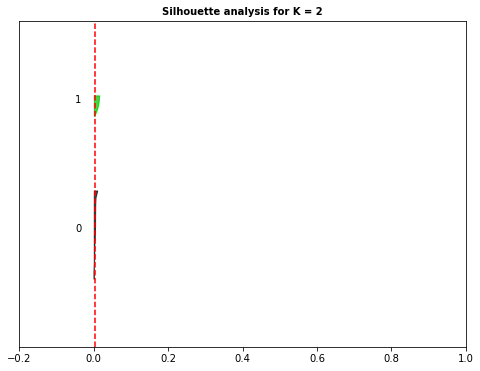

In [17]:
silhouette(kmeans_results, final_df, plot=True)

In [18]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

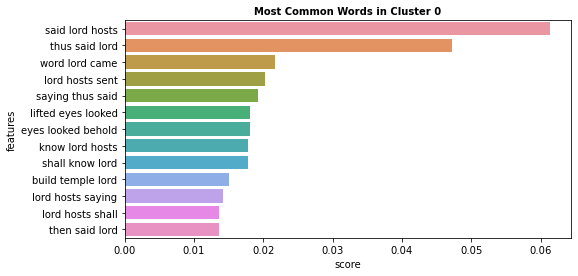

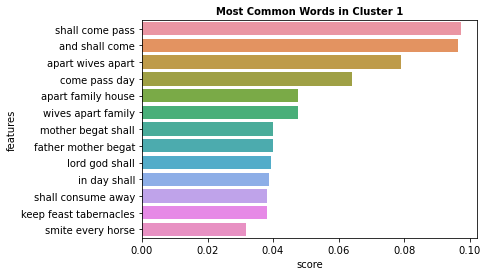

In [19]:
best_result = 2
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [20]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

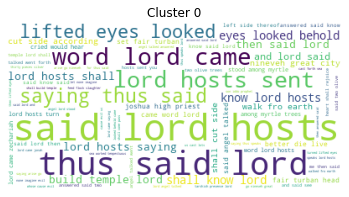

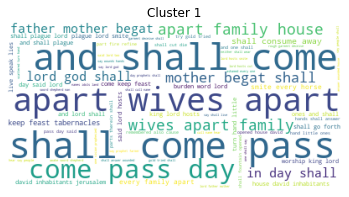

In [21]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [22]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Jonas_1,"'word', 'lord', 'came', 'jonah', 'son', 'amitt...",0
101,Jonas_2,"'jonah', 'prayed', 'lord', 'god', 'fish', ', '...",0
102,Jonas_3,"'word', 'lord', 'came', 'jonah', 'second', 'ti...",0
103,Jonas_4,"'displeased', 'jonah', 'exceedingly', ',', 'an...",0
104,Zacarias_1,"'eighth', 'month', ',', 'second', 'year', 'dar...",0


In [23]:
print(df)

           Autor                                              Livro  label
100      Jonas_1  'word', 'lord', 'came', 'jonah', 'son', 'amitt...      0
101      Jonas_2  'jonah', 'prayed', 'lord', 'god', 'fish', ', '...      0
102      Jonas_3  'word', 'lord', 'came', 'jonah', 'second', 'ti...      0
103      Jonas_4  'displeased', 'jonah', 'exceedingly', ',', 'an...      0
104   Zacarias_1  'eighth', 'month', ',', 'second', 'year', 'dar...      0
105   Zacarias_2  'lifted', 'eyes', ',', 'looked', ',', 'behold'...      0
106   Zacarias_3  'showed', 'joshua', 'high', 'priest', 'standin...      0
107   Zacarias_4  'angel', 'talked', 'came', ',', 'waked', ',', ...      0
108   Zacarias_5  'turned', ',', 'lifted', 'eyes', ',', 'looked'...      0
109   Zacarias_6  'turned', ',', 'lifted', 'eyes', ',', 'looked'...      0
110   Zacarias_7  'came', 'pass', 'fourth', 'year', 'king', 'dar...      0
111   Zacarias_8  'word', 'lord', 'hosts', 'came', ',', 'saying'...      0
112   Zacarias_9  'burden